<a href="https://colab.research.google.com/github/Ayaba01/Ayaba01/blob/main/22016328.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Installing Libraries

import datetime as dt
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

#setting matplotlib style
plt.style.use('ggplot')

In [2]:
# Download stock data from Yahoo Finance

tickers = 'NIO', 'CLNE', 'JMIA'
start = dt.datetime(2022, 1, 1)
end = dt.datetime(2023, 12, 31)
print(end)
print(f"You have {len(tickers)} assets in your porfolio")

2023-12-31 00:00:00
You have 3 assets in your porfolio


In [3]:
df = yf.download(tickers, start, end, interval='1d')['Adj Close']
df

[*********************100%%**********************]  3 of 3 completed


,CLNE,JMIA,NIO
Date,,,
2022-01-03,6.54,11.97,33.470001
2022-01-04,6.63,11.24,31.580000
2022-01-05,6.07,10.23,29.879999
2022-01-06,6.19,10.27,29.309999
2022-01-07,6.20,10.29,29.299999
...,...,...,...
2023-12-22,3.95,3.82,8.420000
2023-12-26,4.06,3.81,9.330000
2023-12-27,4.07,3.77,9.100000


In [6]:
df.to_csv(r"C:\Users\esthe\OneDrive\Desktop\adclose.csv")

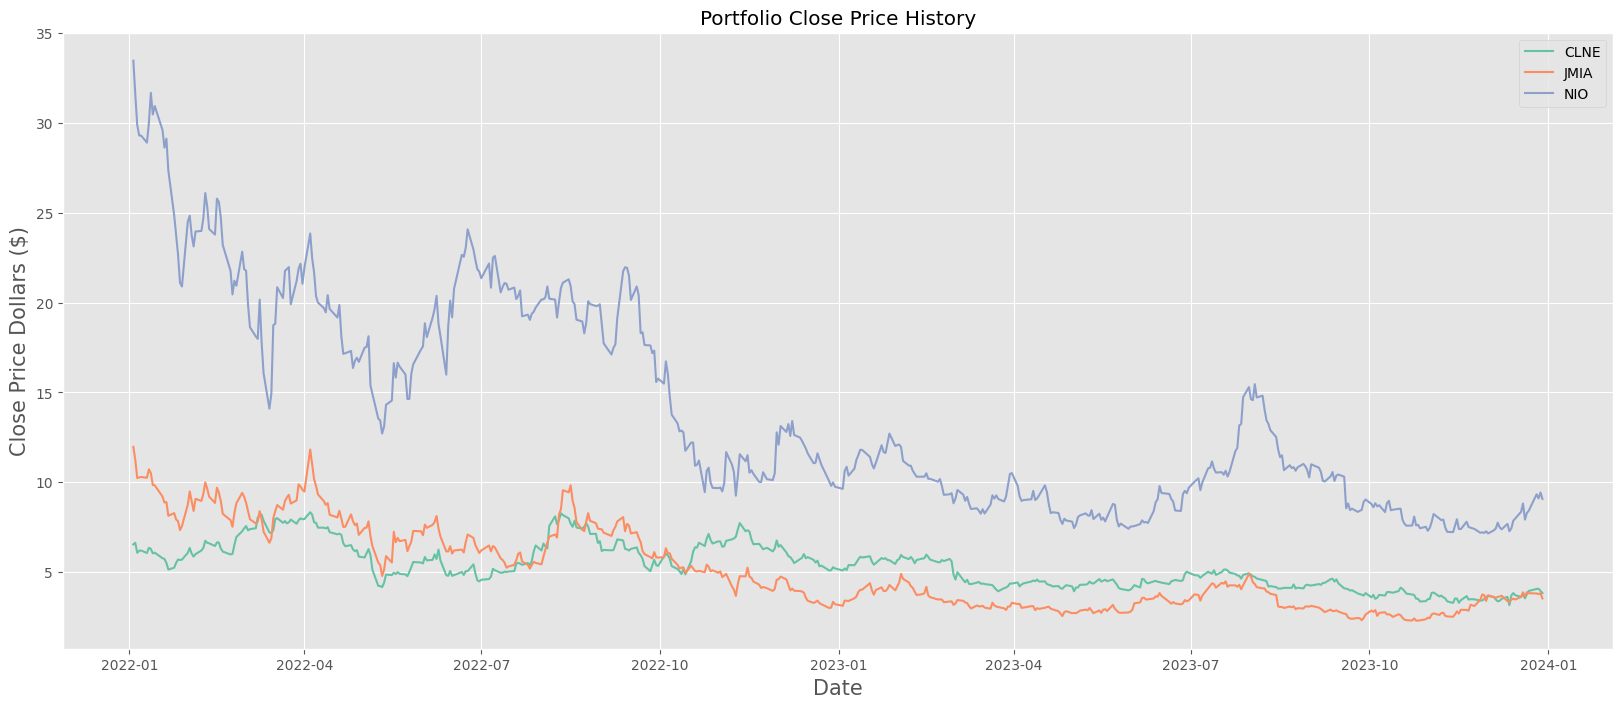

In [4]:
#Plotting to see the close price history

# Create a custom color palette
colors = sns.color_palette('Set2', n_colors=len(df.columns))

# Plotting
fig, ax = plt.subplots(figsize=(20, 8))

for i, col in enumerate(df.columns):
    ax.plot(df[col], label=col, color=colors[i])

ax.set_title("Portfolio Close Price History")
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Close Price Dollars ($)', fontsize=15)
ax.legend(loc='best')

plt.show()

In [5]:
## Correlation Matrix to see the relationship between the stocks

correlation_matrix = df.corr(method='pearson')
correlation_matrix


,CLNE,JMIA,NIO
CLNE,1.000000,0.769349,0.636258
JMIA,0.769349,1.000000,0.923495
NIO,0.636258,0.923495,1.000000


Correlation between Stocks in your portfolio


<function matplotlib.pyplot.show(close=None, block=None)>

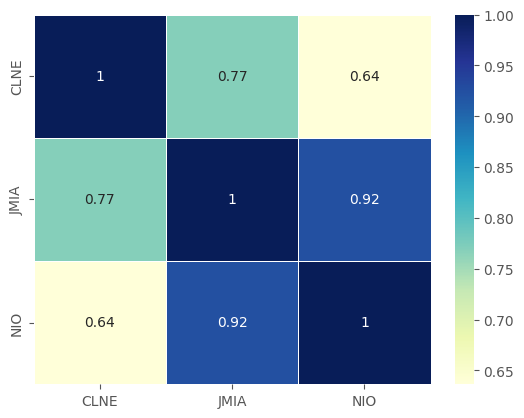

In [6]:
#Plotting the Correlation Matrix using heatmap for better visualisation

sns.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,
cmap='YlGnBu', annot=True, linewidth=0.5)
print('Correlation between Stocks in your portfolio')
plt.show

In [7]:
#Calculating Daily Simple Returns:

daily_simple_return = df.pct_change(1)
daily_simple_return.dropna(inplace=True)
daily_simple_return


,CLNE,JMIA,NIO
Date,,,
2022-01-04,0.013761,-0.060986,-0.056469
2022-01-05,-0.084465,-0.089858,-0.053832
2022-01-06,0.019769,0.003910,-0.019076
2022-01-07,0.001615,0.001947,-0.000341
2022-01-10,-0.022581,-0.003887,-0.013311
...,...,...,...
2023-12-22,0.047745,-0.015464,0.015682
2023-12-26,0.027848,-0.002618,0.108076
2023-12-27,0.002463,-0.010499,-0.024652


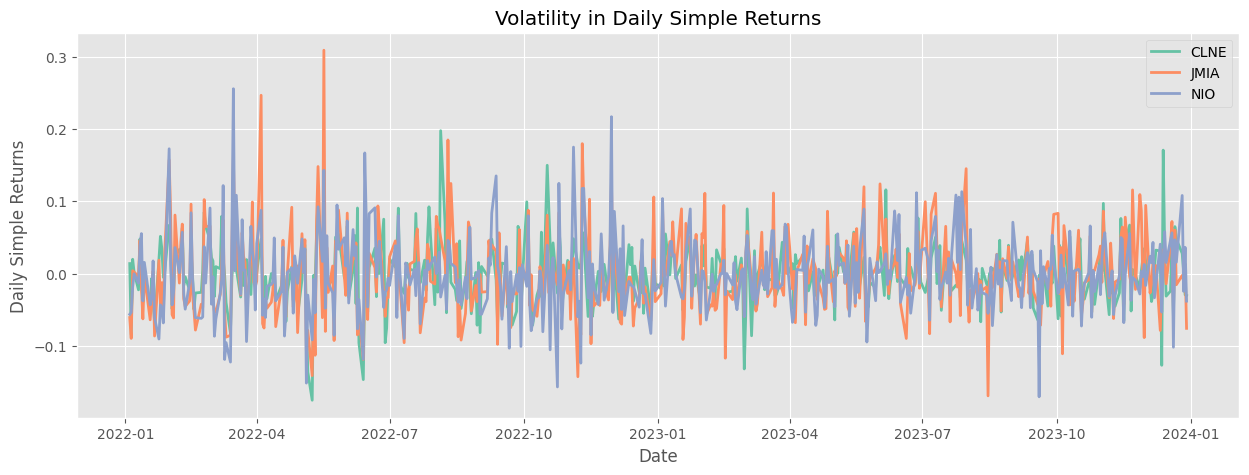

In [8]:
# Plotting to Visualise the fluctuations in Daily Simple Return

colors = sns.color_palette('Set2', n_colors=len(daily_simple_return.columns))

# Plotting
fig, ax = plt.subplots(figsize=(15, 5))
for i, col in enumerate(daily_simple_return.columns.values):
    ax.plot(daily_simple_return[col], lw=2, label=col, color=colors[i])

ax.legend(loc='best', fontsize=10)
ax.set_title('Volatility in Daily Simple Returns')
ax.set_xlabel('Date')
ax.set_ylabel('Daily Simple Returns')
plt.show()

In [9]:
#The Average Daily Returns represents the average percentage change
#in the closing prices of stocks on a daily basis.

print('Average Daily returns(%) of stocks in your portfolio')
Avg_daily = daily_simple_return.mean()
print(Avg_daily)
print(Avg_daily*100)

Average Daily returns(%) of stocks in your portfolio
CLNE   -0.000232
JMIA   -0.000904
NIO    -0.001316
dtype: float64
CLNE   -0.023174
JMIA   -0.090430
NIO    -0.131554
dtype: float64


<Axes: title={'center': 'Risk Box Plot'}>

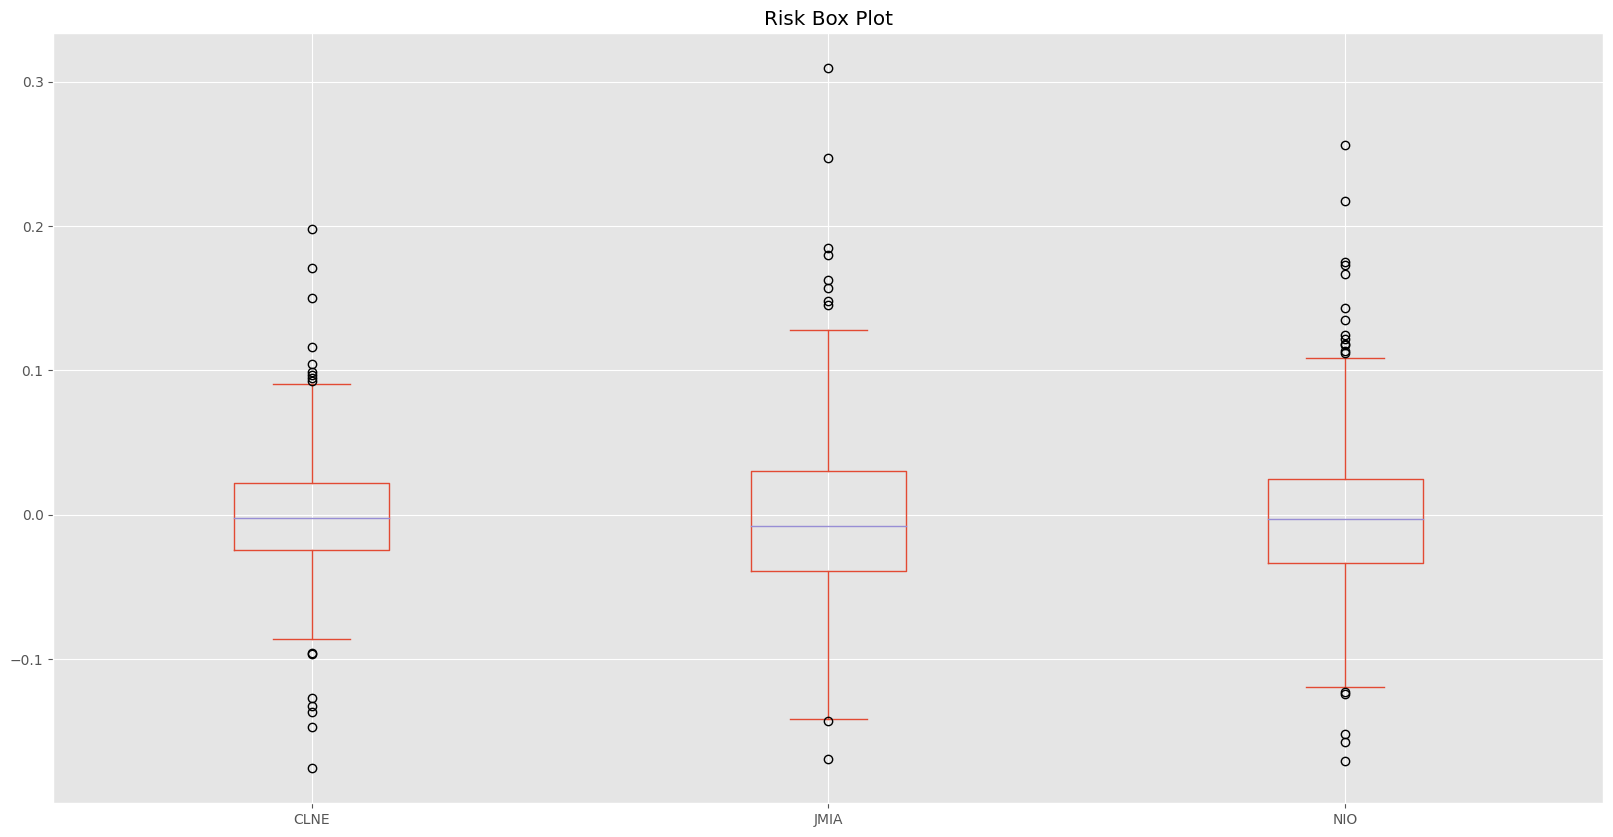

In [ ]:
#Risk
#Plotting Risk using Daily Returns:

daily_simple_return.plot(kind = "box",figsize = (20,10), title = "Risk Box Plot")

In [10]:
# The standard deviation of a stock is a measure of the amount of variation of the stock's returns from its mean return.
# It provides insights into the level of risk associated with the portfolio.

print('Annualised Standard Deviation (Volatality(%), 252 trading days) of individual stocks in your portfolio on the basis of daily simple returns.')
print(daily_simple_return.std() * np.sqrt(252) * 100)


Annualised Standard Deviation (Volatality(%), 252 trading days) of individual stocks in your portfolio on the basis of daily simple returns.
CLNE    65.093151
JMIA    89.086968
NIO     81.353028
dtype: float64


In [11]:
#Sharpe Ratio
Avg_daily / (daily_simple_return.std() * np.sqrt(252))*100


CLNE   -0.035602
JMIA   -0.101508
NIO    -0.161708
dtype: float64

In [12]:
#Cummulative Returns:
#This is the cumulative growth of an investment starting from the beginning of the time series.

daily_cummulative_simple_return =(daily_simple_return+1).cumprod()
daily_cummulative_simple_return

,CLNE,JMIA,NIO
Date,,,
2022-01-04,1.013761,0.939014,0.943531
2022-01-05,0.928135,0.854637,0.892740
2022-01-06,0.946483,0.857978,0.875710
2022-01-07,0.948012,0.859649,0.875411
2022-01-10,0.926606,0.856307,0.863759
...,...,...,...
2023-12-22,0.603976,0.319131,0.251569
2023-12-26,0.620795,0.318296,0.278757
2023-12-27,0.622324,0.314954,0.271885


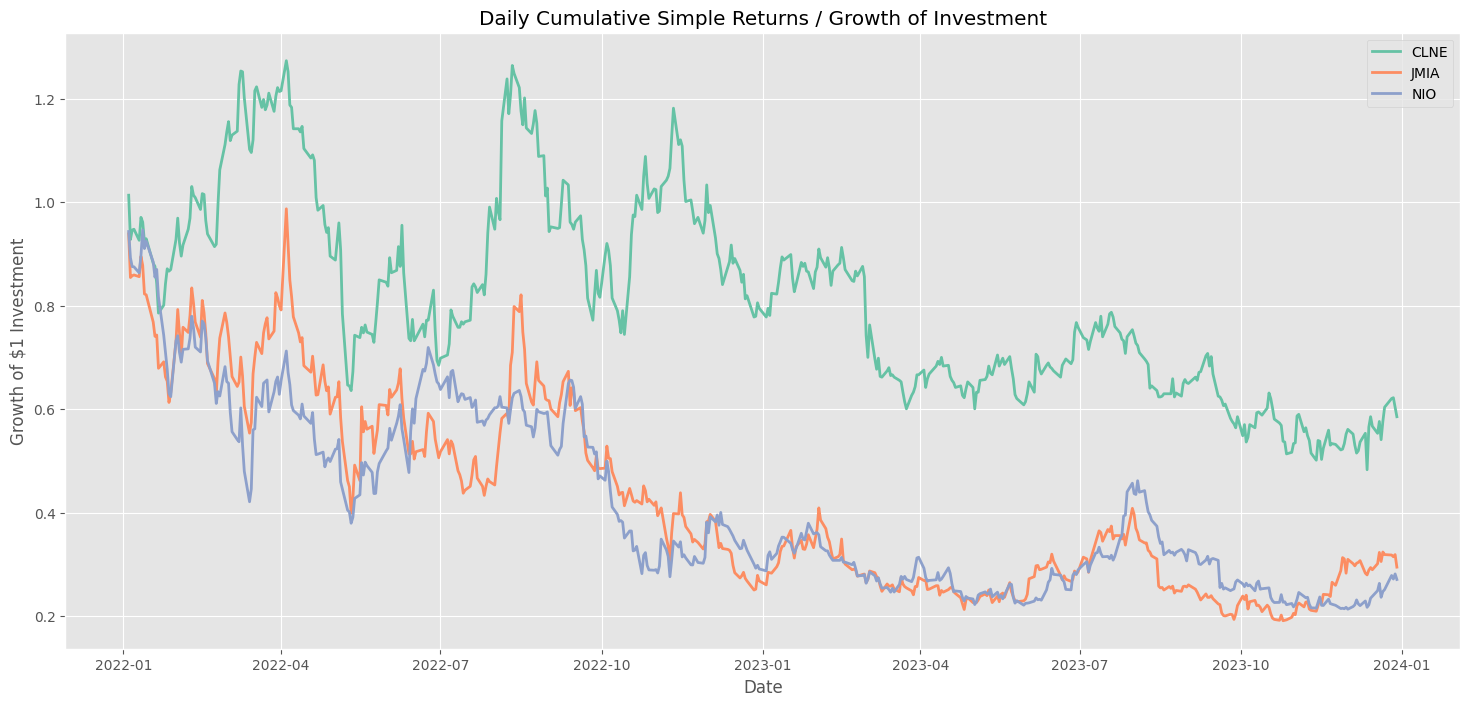

In [13]:
#Visualising Cumulative Returns

# Create a Seaborn color palette with distinct colors
colors = sns.color_palette('Set2', n_colors=len(daily_cummulative_simple_return.columns))

# Plotting
fig, ax = plt.subplots(figsize=(18, 8))
for i, col in enumerate(daily_cummulative_simple_return.columns.values):
    ax.plot(daily_cummulative_simple_return[col], lw=2, label=col, color=colors[i])

ax.legend(loc='best', fontsize=10)
ax.set_title('Daily Cumulative Simple Returns / Growth of Investment')
ax.set_xlabel('Date')
ax.set_ylabel('Growth of $1 Investment')
plt.show()

In [14]:
daily_cummulative_simple_return.to_csv(r"C:\Users\esthe\OneDrive\Desktop\3_Cum_returns.csv")